# k-Nearest Neighbor (k-NN) Regression

##Contents

0.   Learning Objectives
1.   Tutorial Details
2.   Problem Statement Description
3.   Import Packages
4.   Load and Prepare the Dataset
5.   Peform Exploratory Data Analysis (EDA)
6.   Model Building: Training and Testing
7.   Results and Interpretation
8.   Conclusion
9.   Try it yourself excercise
10.  Summary

#0. Learning Objectives

*   Application of **k-NN Regression** on a public dataset
*   Use of different **Feature Scaling** techniques
*   Identification of the **outliers**
*   Combining multiple target variables
*   **Feature Selection**
*   **Hyperparameter tuning**: Finding the optimal number of clusters (k)


#1. Tutorial Details

*   **ML Topic(s) Covered**: k-NN-Regression, Multivariate Regression
*   Approximate model training time: Less than 5 min.

#2. Problem Statement Description

*   **Objective**: To build a k-NN regression model for the prediction of heating and cooing load requirements of the building using the available data.
*   **Data Description**: This data is about the **energy analysis of buildings using different building shapes** simulated in Ecotect software. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters.
*  Each row represents the attributes of a particular **building shape & characteristics**. This is a data of 768 samples, so the data contains 768 rows.
*  There are 8 data attributes (columns) - X1 Relative Compactness, X2 Surface Area, X3 Wall Area, X4 Roof Area, X5 Overall Height, X6 Orientation, X7 Glazing Area, and X8 Glazing Area Distribution.
* y1 Heating Load and y2 Cooling Load are the target variables. Thus, this is a case of a **multiple response regression**.


*   More information is available here: https://archive.ics.uci.edu/ml/datasets/energy+efficiency

# 3. Import Packages

Package versions

*   pandas==1.4.4
*   numpy==1.22.4
*   matplotlib==3.7.1
*   sklearn==1.2.2


In [ ]:
# Pandas contains functions data manipulation and analysis
import pandas as pd

#Numpy combines high-level mathematical operating capabilites with large, multi-dimensional arrays and matrices
import numpy as np

# Matplotlib is a data visualization library containing functions for static, animated, and interactive 2D and 3D plots
import matplotlib.pyplot as plt

# Scikit-learn (sklearn) contains functions of machine learning models, evaluation metrics, helper functions and datasets
import sklearn

#4. Load and Prepare the Dataset

In [ ]:
#Import the data from the provided URL and store it as a DataFrame
data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
#Print
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Here, we have two target variables placed at the end of the dataframe.

In [ ]:
#Print the shape of the data
data.shape

(768, 10)

There are 10 columns and 768 rows in the imported data.

In [ ]:
#Check information about the data including information about the rows and columns, number of non-null values per column, datatype of each column  and total memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB



*   There are no null values in any column.
*   The data occupies a memory of 60.1 KB
*   X6 and X8 contain int-type values while the remaining features and both the response variables contain float-type values.



In [ ]:
#Let us check for any additional information
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


The range of the features vary drastically.

Below, let us separate the features (independent variables) and the target variables (dependent variable) in the data.

In [ ]:
features = data.iloc[:, :-2]
predictions = data.iloc[:, -2:] #Last two columns contains the target variables

In [ ]:
#Print a fews rows of independent variables
features.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [ ]:
#Print a fews rows of dependent variables
predictions.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


The data is split into features and predictions.

### Feature Scaling

Feature scaling is a technique to standardize the range of values of input features (independent variables) in a dataset.

The **goal** of feature scaling is to ensure that each feature contributes equally to the analysis and to improve the performance of the ML algorithms.

The most common types of feature scaling are normalization and standardization.


1.   **Normalization** scales the values of a feature to be **between 0 and 1** (or between -1 and 1), based on the minimum and maximum values of the feature.
2.   **Standardization** scales the values of a feature to have a **mean of 0 and a standard deviation of 1**, based on the mean and standard deviation of the feature in the data. Its implicit assumption is that each feature is distributed as a standard normal distribution.

**Importance of Feature Scaling**

Feature scaling is important because many ML-algorithms are sensitive to the scale of the input features. If the input features are on different scales, the algorithm may give *more weight to features with larger values*, leading to biased results. By scaling the features, we can ensure that all features contribute equally to the analysis and improve the accuracy of the algorithm.


Here, we perform standardization.

In [ ]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Used to perform standardization of the features
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575


Now the range of each feature has been altered to vary around zero.

Below, let us divided into the training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=42, shuffle=True)
#20% of the total data is kept as test data

#5.   Peform Exploratory Data Analysis (EDA)



In [ ]:
Train_data = pd.concat([X_train, y_train], axis = 'columns', #Join along the columns
                       names=[features.columns, predictions.columns])
Train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
60,0.528182,-0.672602,0.000000,-0.655880,1.0,-1.341641,-1.009323,-1.169393,23.53,27.31
618,-1.174613,1.275625,0.561951,0.972512,-1.0,0.447214,1.244049,-0.524211,18.90,22.09
346,0.906580,-0.950920,-0.561951,-0.655880,1.0,0.447214,0.117363,-0.524211,29.27,29.90
294,1.284979,-1.229239,0.000000,-1.198678,1.0,0.447214,0.117363,-1.169393,32.84,32.71
231,-0.985413,0.997307,0.000000,0.972512,-1.0,1.341641,-1.009323,0.766154,11.43,14.83


### Summary Statistics

In [ ]:
#Print summary statistics
Train_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-0.023547,0.024100,0.007322,0.019964,-0.016287,0.010197,0.007875,-0.008275,22.155033,24.410765
std,0.997305,1.001505,0.993988,0.996094,1.000683,0.991593,1.007649,1.001263,10.054280,9.476566
min,-1.363812,-1.785875,-1.685854,-1.470077,-1.000000,-1.341641,-1.760447,-1.814575,6.010000,10.900000
25%,-0.985413,-0.672602,-0.561951,-0.655880,-1.000000,-0.447214,-1.009323,-1.008097,12.977500,15.640000
50%,-0.228616,0.162352,0.000000,0.972512,-1.000000,0.447214,0.117363,0.120972,18.250000,21.500000
75%,0.528182,0.997307,0.561951,0.972512,1.000000,0.447214,1.244049,0.766154,31.545000,32.920000
max,2.041777,1.553943,2.247806,0.972512,1.000000,1.341641,1.244049,1.411336,43.100000,48.030000


Notice that, as expected, the mean and standard deviation of each feature is approximately zero and one, respectively.

Let us also visualize the features in a box plot to check for outliers.

**Box Plot** is the visual representation of the distribution of the numerical data through their quartiles. It is useful for detect the outlier in data set. It summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower quartile, median and upper quartile.

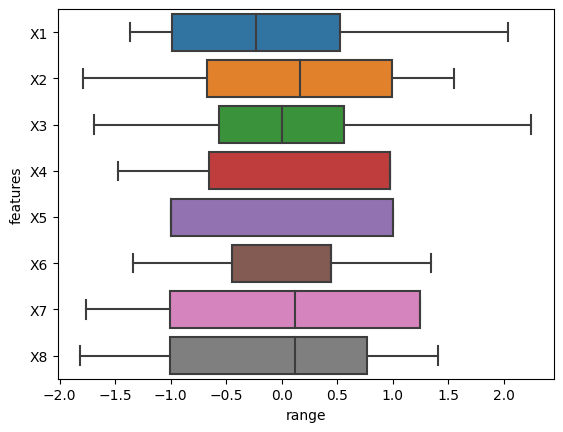

In [ ]:
# Seaborn is a data visualization library based on matplotlib
import seaborn as sns

sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.show()

It is evident from both statistics and the plot that there are no outliers in the data.

If there were any outliers, these would have been highlighted as a diamond shaped point placed outside the box.

**Outliers** are generally handled similar to the deletion process of handling missing data, causeously deleting data (row or column) that contains outliers.

Alternately, the specific value acting as an outlier can be removed, considering it as a missing value and accordingly handling it.

**Important**: In some cases, the presence of outliers may be genuine extreme values that represent important information or insights in the data. Removing such outliers can lead to loss of information and bias the results. In other cases, removing outliers may not improve the performance of the ML model or may even lead to overfitting.

Therefore, the decision to remove outliers in ML model preparation should be based on the specific characteristics of the dataset, the research question, and the domain-specific knowledge.

It is important to carefully consider the impact of outliers on the analysis and the performance of the ML model and choose an appropriate outlier handling technique, such as data transformation or modeling with robust regression, instead of always removing outliers.

It is also important to document the outlier handling process and its impact on the analysis and the ML model to ensure the transparency and reproducibility of the results.

### Correlation Analysis

In [ ]:
#Perform correlation analysis between numerical features
corr_mat = Train_data.corr(method ='pearson') #Pearson correlation is used
corr_mat

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991923,-0.211912,-0.870389,0.831108,-0.003444,0.009575,0.001160,0.629314,0.642148
X2,-0.991923,1.000000,0.204776,0.881746,-0.860752,0.005307,-0.012996,-0.001782,-0.664684,-0.679988
X3,-0.211912,0.204776,1.000000,-0.281167,0.267395,0.014898,-0.019823,-0.012122,0.439092,0.410905
X4,-0.870389,0.881746,-0.281167,1.000000,-0.972779,-0.001977,-0.003189,0.004095,-0.863294,-0.864714
X5,0.831108,-0.860752,0.267395,-0.972779,1.000000,-0.007185,0.003697,-0.007357,0.889154,0.894927
X6,-0.003444,0.005307,0.014898,-0.001977,-0.007185,1.000000,0.029363,0.010337,0.001772,0.008773
X7,0.009575,-0.012996,-0.019823,-0.003189,0.003697,0.029363,1.000000,0.206917,0.276184,0.212642
X8,0.001160,-0.001782,-0.012122,0.004095,-0.007357,0.010337,0.206917,1.000000,0.080206,0.041308
Y1,0.629314,-0.664684,0.439092,-0.863294,0.889154,0.001772,0.276184,0.080206,1.000000,0.976316
Y2,0.642148,-0.679988,0.410905,-0.864714,0.894927,0.008773,0.212642,0.041308,0.976316,1.000000


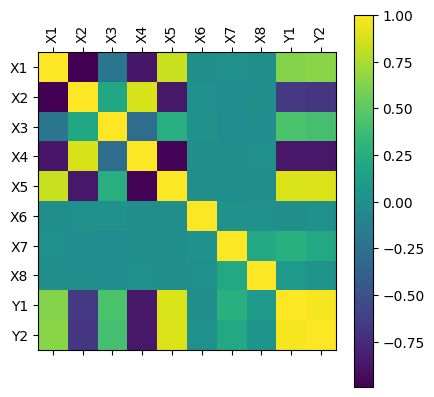

In [ ]:
# Visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

*   X5 shows strong positive correlation with both the target variables.
*   X4 shows strong negative correlation with both the target variables.
*   X1 shows moderate positive correlation with both the target variables.
*   X2 shows moderate negative correlation with both the target variables.
*   X3 and X7 show weak positive correlation with both the target variables.
*   X6 and X8 show no correlation with both the target variables.

### Combining Target Variables

In addition to theabove observations, one can observe that there is a strong correlation between the two target variables.In such a case, one may also think of combining them into one and solve it as a multiple univariate regression problem. However, this is convenient only when the problem statement makes sense even after the combination of the target variables. Below are some examples where combining the target variables could be helpful.

*  **Financial Modeling**: An analyst may be interested in predicting a company's profitability using both its **net income** and **gross profit margin**. Since net income and gross profit margin are both measures of profitability, combining them into a single target variable using a weighted average or linear combination could provide a more comprehensive measure of overall profitability.

*  **Medical Research**: A medical researcher may be interested in predicting a patient's risk of heart disease using both their **blood pressure** and **cholesterol levels**. Since blood pressure and cholesterol levels are both important risk factors for heart disease, combining them into a single target variable could provide a more accurate measure of overall risk.

In our current context, we will continue to view both Y1 and Y2 as two separate target variables.

### Visualizations


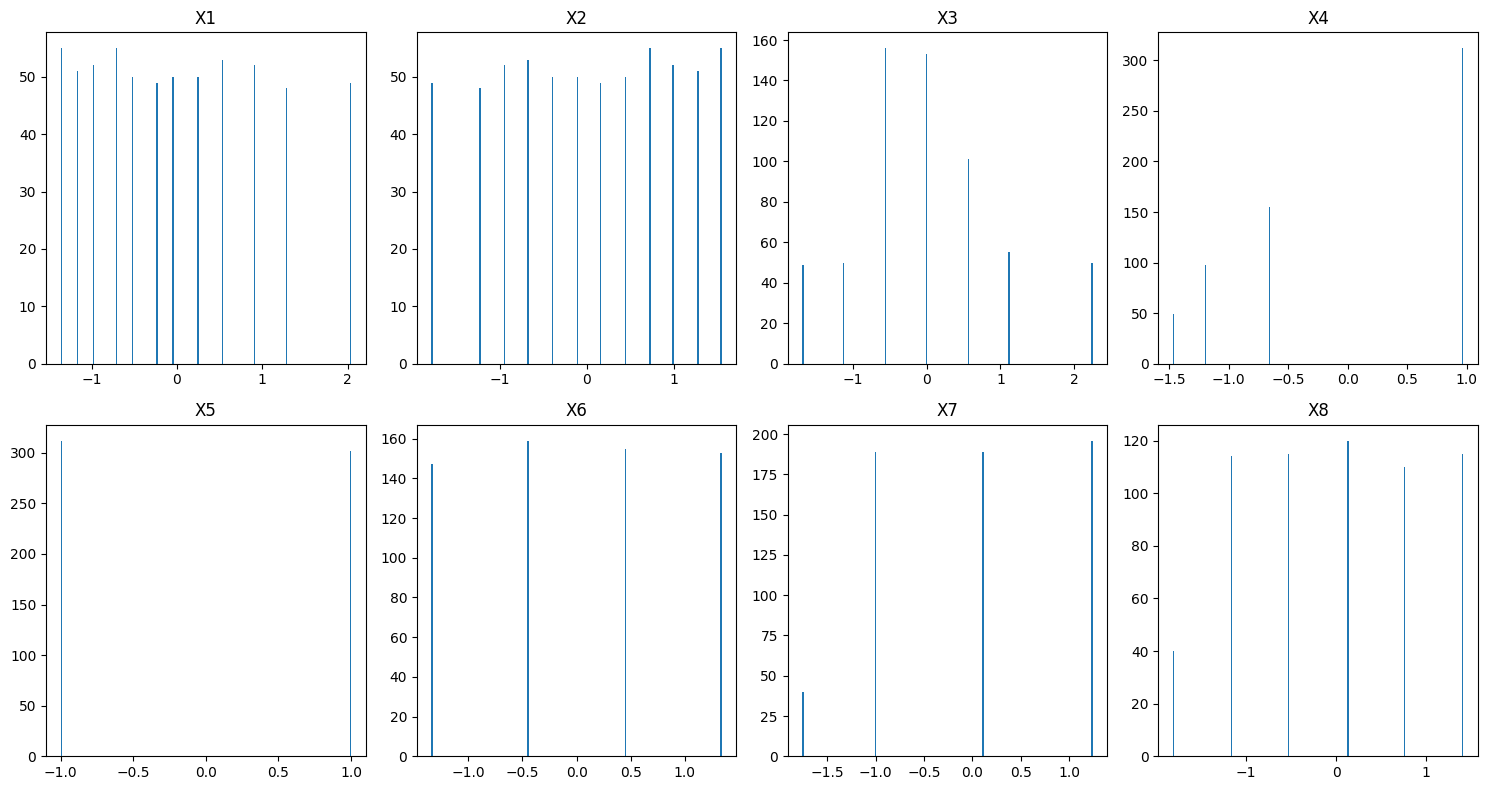

In [ ]:
# Explore the distributions of individual feature values
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs = axs.flatten()

for i, col in enumerate(Train_data.columns[:-2]):
    axs[i].hist(Train_data[col], bins=200)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

The key observation from these plots is that although the values of all the features are numerical, these contain discrete vaues only.

This can be verified  by counting the number of unique values of each column in the train data.


In [ ]:
# Calculate the number of unique values in each column
unique_values = Train_data.nunique()
print(unique_values)

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    490
Y2    526
dtype: int64


Indeed the values for each column are discrete.

Now, let us also visualize the distibution of  the target variables.

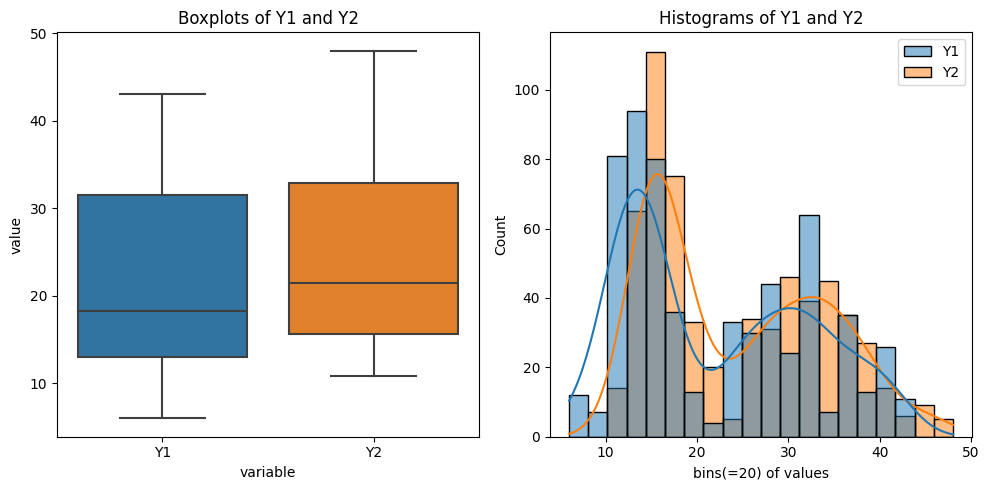

In [ ]:
# Explore the distributions of individual target variable values
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()

sns.boxplot(x="variable", y="value", data=pd.melt(Train_data[["Y1", "Y2"]]), ax=axs[0])
axs[0].set_title("Boxplots of Y1 and Y2")

sns.histplot(data=Train_data[["Y1", "Y2"]], ax=axs[1], bins=20, kde=True)
axs[1].set(xlabel='bins(=20) of values')
axs[1].set_title("Histograms of Y1 and Y2")

plt.tight_layout()
plt.show()


*   There are no outliers in the target variables
*   The mean range of both varies between 10 and 30 with the histogram peaks at each terminal (10 and 30).

#6. Model Building: Training and Testing

In [ ]:
#Import KNN regression class
from sklearn.neighbors import KNeighborsRegressor
model = knn = KNeighborsRegressor(n_neighbors=7) #K=7

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set

# 7. Results and Interpretation


In [ ]:
# Evaluate the model using commonly used metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data
print("Evaluation metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data
Mean absolute error:  1.4894741740344353
Mean squared error:  4.892044346207541
R-squared score:  0.9481202515645063


We are able to built a KNN regression model that predicts the two target variables Y1 and Y2 of the students with an R2 score of 0.95 on train data.

Below, let us check the evaluation metrics of the test data.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print the evaluation metrics on test data
print("Evaluation metrics: Test Data")
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Evaluation metrics: Test Data
Mean absolute error:  1.6193172541743976
Mean squared error:  6.209619325735488
R-squared score:  0.9362816216747056


The model performance (R2 score) is 0.93 on the test data.

# Can we improve this further?

So far, in this tutorial, we assumed that all the features given to us are relevant. But we also saw that feature X6 and X8 did not show any correlation with the output variables. Let us drop columns X6 and X8 and check if our model evalaution metrics improve. This process of selecting a subset of relevant features from the pool of available features is known as **featrue selection**.

### Feature Selection

Feature selection is proven to improve the accuracy, efficiency, and interpretability of the models, and reduce the complexity and dimensionality of the data.


We saw previously that features X6 and X8 show no correlation with either of the target variables. Let us drop these and re-train the model.

In [ ]:
# Drop the features X6 and X8
X_train_selected = X_train.drop(['X6','X8'], axis=1, inplace=False)
X_test_selected = X_test.drop(['X6','X8'], axis=1, inplace=False)

In [ ]:
model_selected = knn = KNeighborsRegressor(n_neighbors=7) #K=7

model_selected.fit(X_train_selected, y_train) #Training the model on train data
y_pred_train_selected = model_selected.predict(X_train_selected) #Make predictions on the training set
y_pred_test_selected = model_selected.predict(X_test_selected) #Make predictions on the testing set

In [ ]:
#Check the R2 score
r2_train_selected = r2_score(y_train, y_pred_train_selected)
print('Train r2 score after featrue selection: ', r2_train_selected)
r2_test_selected = r2_score(y_test, y_pred_test_selected)
print('Test r2 score after featrue selection: ', r2_test_selected)

Train r2 score after featrue selection:  0.9776411921335965
Test r2 score after featrue selection:  0.9762958196476678


The r2 scores have shot up significantly. This proves the effectiveness of feature selection.

Observations:


*   The difference between the train and test r2 score is negligible.
*   The values of both train and test r2 scores is high.

This shows that our model is appropriately trained.

Can we improve it further?

### Hyperparameter tuning: Finding the best K

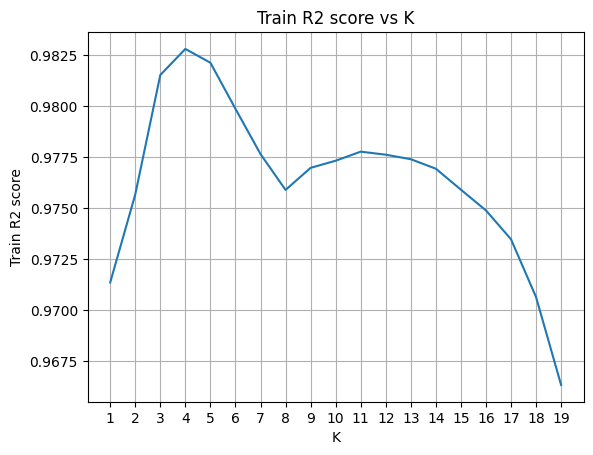

In [ ]:
# Hyperparameter tuning
k_values = list(range(1, 20)) #k ranges between 1 and 19
model_best = KNeighborsRegressor() #Notice that the value of K is not inserted here
r2_values, mse_values = [], []
for k in k_values:
  model_best.set_params(n_neighbors=k)
  model_best.fit(X_train_selected, y_train)
  y_pred_current = model_best.predict(X_train_selected)
  r2_current = r2_score(y_train, y_pred_current)
  r2_values.append(r2_current)
  mse_current = mean_squared_error(y_train, y_pred_current)
  mse_values.append(mse_current)


# Plot the variation of R2 for various values of K
plt.plot(k_values, r2_values)
plt.title("Train R2 score vs K")
plt.xlabel("K")
plt.ylabel("Train R2 score")
plt.xticks(k_values)
plt.grid()
plt.show()

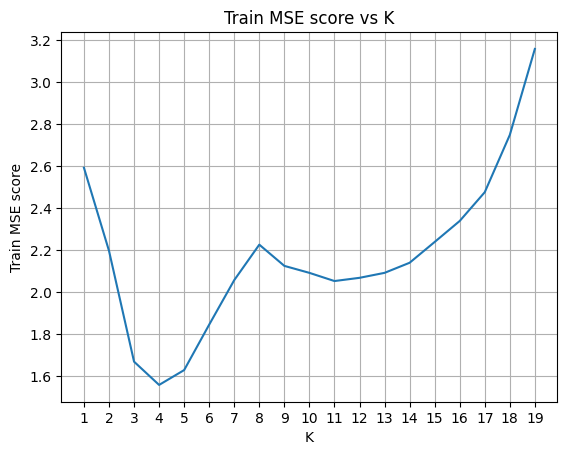

In [ ]:
# Plot the variation of MSE for various values of K
plt.plot(k_values, mse_values)
plt.title("Train MSE score vs K")
plt.xlabel("K")
plt.ylabel("Train MSE score")
plt.xticks(k_values)
plt.grid()
plt.show()

The MSE plot confirms that k=4 is the best choice.

In [ ]:
# Fit the KNN regression model with the best hyperparameter K and evaluate its performance on the testing set
k_best = k_values[np.argmax(r2_values)]
model_best.set_params(n_neighbors=k_best)
model_best.fit(X_train_selected, y_train)
y_train_pred_best = model_best.predict(X_train_selected)
y_test_pred_best = model_best.predict(X_test_selected)
r2_best_train = r2_score(y_train, y_train_pred_best)
r2_best_test = r2_score(y_test, y_test_pred_best)
print("Best K: ", k_best)
print('Train R2 score: ', r2_best_train)
print("Test R2 score: ",r2_best_test)

Best K:  4
Train R2 score:  0.9827939003680013
Test R2 score:  0.9761765320385598




The train score for K=4 is slightly higher than at K=7.
However, the test score remains the same.


What should be done here? Think critically!




The current model (with K=4) is the best suited model. It is utilizing the variance (information) from the train data to improve itself further.

Note: We can conclude this because the value of both train and test r2 score is high and the difference between the two is low. If any one of the condition is not satisfied, we have to check the model for overfitting.

# 8. Conclusion

We have built a k-NN regression model that predicts the heating and cooing load requirements of the building with an R2 score of approx. 0.98 on train and 0.97 on test data.

The best value of the number of clusters turns out to be four.

# 9.   Try it yourself excercise



*   **Problem Statement**: To predict the burned area of forest fires, in the northeast region of Portugal, given the meteorological and other data using KNN regression.
*   More information is available here: https://archive.ics.uci.edu/ml/datasets/Forest+Fires


Note: This excercise is for your own practice only. Neither its solution will be shared nor will it be evaluated.




In [ ]:
#Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Hint: The value of the output variable (*area*) is skewed towards 0.0. One way to deal with this is to model with the logarithm transform of the target variable using the below code.

In [ ]:
# Log transform the target variable 'area'
data['area'] = np.log(data['area'] + 1)

The +1 is added to avoid taking the logarithm of zero or negative values, which would otherwise result in undefined or infinite values. Adding 1 to area before taking the logarithm ensures that the values are positive, and helps avoid these issues.

Besides, now you will deal with a log scale of values instead of the linear scale.

# 10. Summary

In this module, we learned

*   To apply a **k-NN Regression** model to a dataset
*   To perform **Feature Scaling** and **Selection**
*   To check for **Outliers** in the data
*   To combine multiple target variables
*   To **train and test** an ML model
*   **Hyperparameter tuning**